# QFT

## Imports

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import cirq
import qiskit

# QFT via Cirq

In [87]:
def qft_cirq(num_qubits):

    # qubits
    q = cirq.LineQubit.range(num_qubits)
    
    # circuit
    circ = cirq.Circuit()
    for i in range(num_qubits):
        for j in range(i, num_qubits):
            if i == j:
                circ.append(cirq.H(q[i]))
            else:
                # circ.append(cirq.CZ(q[i], q[j]) ** (2 ** (-j)))
                circ.append(cirq.ZPowGate(exponent = 2 ** (-j))(q[i]).controlled_by(q[j]))

    # swap
    for i in range(int(num_qubits / 2)):
        circ.append(cirq.SWAP(q[i], q[num_qubits - i - 1]))
    
    # return circuit
    return circ

In [88]:
qft_cirq(4)

┌───────┐   ┌─────────────┐   ┌────────┐
0: ───H───@────────@───────────@───────────────────────────────────────────×───
          │        │           │                                           │
1: ───────@^0.5────┼─────H─────┼──────@──────────@─────────────────────×───┼───
                   │           │      │          │                     │   │
2: ────────────────@^0.25──────┼──────@^0.25─────┼──────H────@─────────×───┼───
                               │                 │           │             │
3: ────────────────────────────@^(1/8)───────────@^(1/8)─────@^(1/8)───H───×───
                  └───────┘   └─────────────┘   └────────┘

## QFT via Qiskit

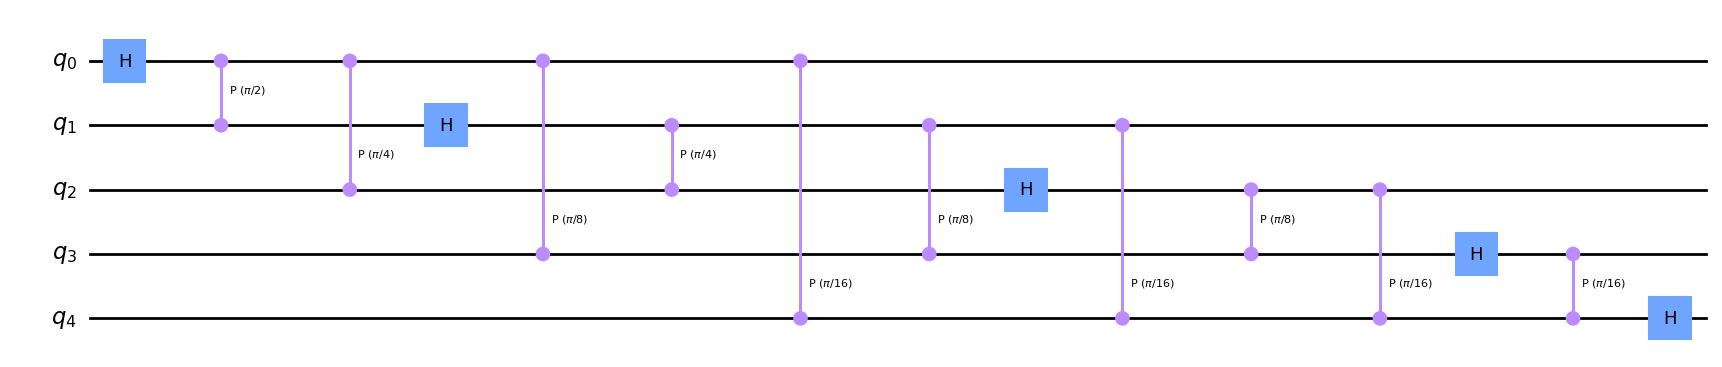

In [46]:
# qubits
num_qubits = 5

# circuit
circ = qiskit.QuantumCircuit(num_qubits)
for i in range(num_qubits):
    for j in range(i, num_qubits):
        if i == j:
            circ.h(i)
        else:
            circ.cp(2 ** (- j) * np.pi, i, j)

# show circuit
circ.draw('mpl')

## Example

<BarContainer object of 32 artists>

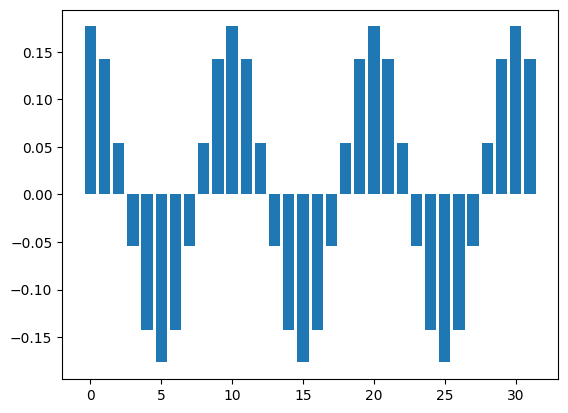

In [103]:
# amplitudes
state = []
for i in range(32):
    state.append(np.exp(-2j * np.pi * i / 10) / np.sqrt(2 ** 5))

plt.bar([_ for _ in range(32)], np.real(state))

10.666666666666666


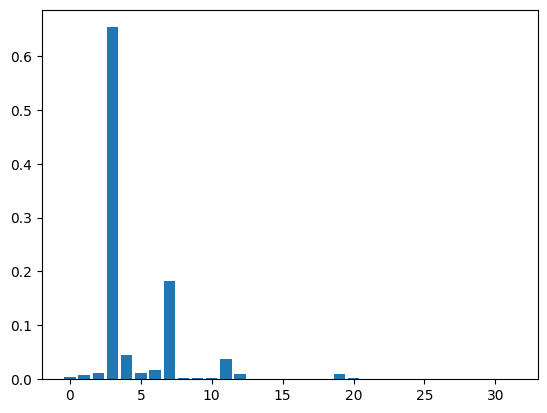

In [98]:
out = cirq.Simulator().simulate(qft_cirq(5), initial_state = state).final_state_vector
out = [abs(x) ** 2 for x in out]
plt.bar([_ for _ in range(32)], out)

print(2 ** 5 / out.index(max(out)))